In [1]:
from nldg.utils import *
from nldg.rf import MaggingRF_PB
from adaXT.random_forest import RandomForest

## Setting 1

In [20]:
dtr = gen_data_v2(n=1000, random_state=42)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 15
random_state = 0

dval = gen_data_v2(n=400)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [21]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

-------------------------------------------------------
1000
-------------------------------------------------------
975
-------------------------------------------------------
563
-------------------------------------------------------
475
-------------------------------------------------------
15
-------------------------------------------------------
460
-------------------------------------------------------
104
-------------------------------------------------------
356
-------------------------------------------------------
195
-------------------------------------------------------
38
-------------------------------------------------------
157
-------------------------------------------------------
161
-------------------------------------------------------
88
-------------------------------------------------------
72
-------------------------------------------------------
16
-------------------------------------------------------
412
--------------------------------------------

np.float64(0.28259593791767174)

In [22]:
fitted_rf_refined, weights_rf_refined = rf.refine_weights(Xtr, Ytr, Etr, Xtr)
preds_rf_refined, _ = rf.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
max_mse(Ytr, fitted_rf_refined, Etr, verbose=True)

Environment 0 MSE: 0.268792999526407
Environment 1 MSE: 0.2687975854024469


np.float64(0.2687975854024469)

### Maximin

In [23]:
rf_maximin = RandomForest("MaximinRegression",
                          n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          seed=random_state,
                          )
rf_maximin.fit(Xtr, Ytr, Etr)
fitted_maximin = rf_maximin.predict(Xtr)
preds_maximin = rf_maximin.predict(Xtr_sorted)
max_mse(Ytr, fitted_maximin, Etr, verbose=True)

0.03358880293688964 0.33588802936889645
[3.68782452] 0.3694768323057861
-------------------------------------------------------
1000
Remaining:  0 [0. 0.]
Best split:  453 4.503834177387155
Impurity:  0.3694768323057861 0.29678159075874655
Best values:  [3.7517245765474323, 3.612089170941905]
Best preds:  (array([3.61208917, 3.75172458]), array([547, 453]))
-------------------------------------------------------
547
Remaining:  453 [36.0949132  87.22846395]
Best split:  72 7.985499500440954
Impurity:  0.29678159075874655 0.2841806366141862
Best values:  [3.2014953191110904, 3.595918850824871]
Best preds:  (array([3.20149532, 3.59591885, 3.75172458]), array([ 72, 475, 453]))
-------------------------------------------------------
475
Remaining:  525 [40.05723238 91.83473833]
Best split:  466 11.424662066264172
Impurity:  0.2841806366141862 0.275659564167415
Best values:  [3.598844551633892, 2.7934966165560744]
-------------------------------------------------------
72
Remaining:  928 [1

np.float64(0.27924553250651957)

In [24]:
fitted_maximin_refined, weights_maximin_refined = rf_maximin.refine_weights(Xtr, Ytr, Etr, Xtr)
preds_maximin_refined, _ = rf_maximin.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
max_mse(Ytr, fitted_maximin_refined, Etr, verbose=True)

Environment 0 MSE: 0.2737982665632114
Environment 1 MSE: 0.27377663860113566


np.float64(0.2737982665632114)

### Magging

In [25]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

-------------------------------------------------------
500
-------------------------------------------------------
62
-------------------------------------------------------
438
-------------------------------------------------------
33
-------------------------------------------------------
405
-------------------------------------------------------
381
-------------------------------------------------------
327
-------------------------------------------------------
95
-------------------------------------------------------
33
-------------------------------------------------------
62
-------------------------------------------------------
232
-------------------------------------------------------
171
-------------------------------------------------------
61
-------------------------------------------------------
54
-------------------------------------------------------
24
-------------------------------------------------------
500
------------------------------------------------

np.float64(0.7712145582382179)

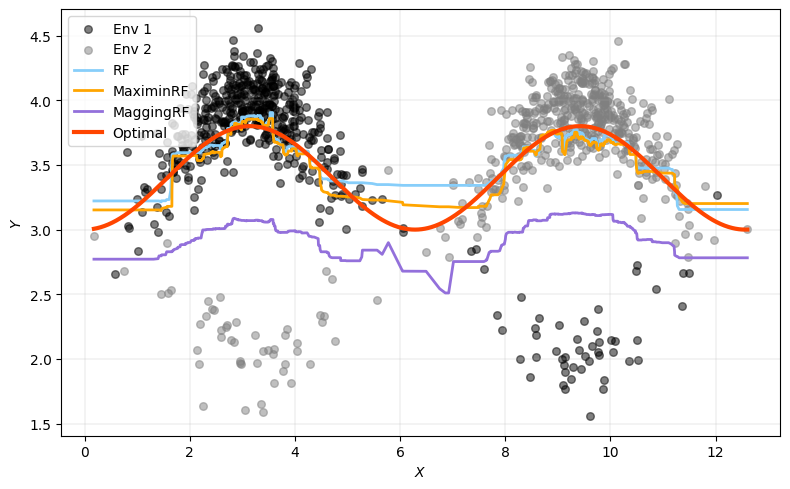

In [26]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_maximin"] = preds_maximin
dtr["fitted_magging"] = preds_magging

plot_dtr(dtr, optfun=1)

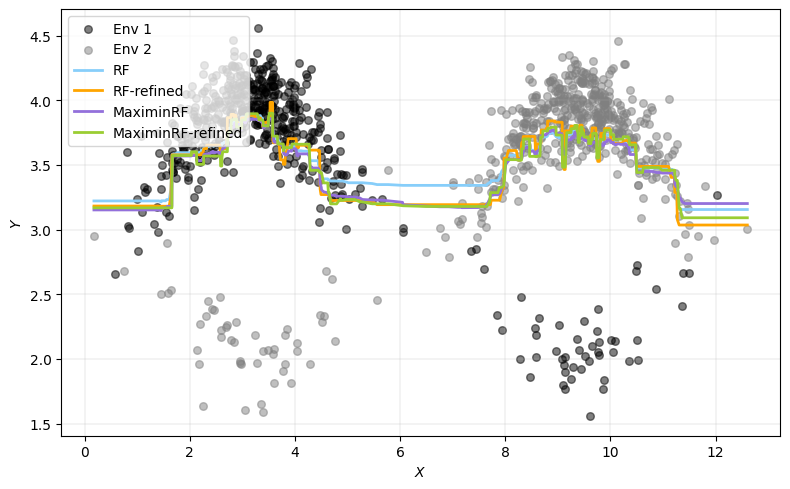

In [27]:
dtr["fitted_maximin_refined"] = preds_maximin_refined
dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr, refined=True)

In [28]:
fitted_opt = 0.8 * np.sin(dtr['X'] / 2) ** 2 + 3
max_mse(Ytr, fitted_opt, Etr, verbose=True)

Environment 0 MSE: 0.2997145987642654
Environment 1 MSE: 0.2792318323691471


np.float64(0.2997145987642654)

## Setting 2

In [10]:
dtr = gen_data_v3(n=1000, setting=2)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 15
random_state = 42

dval = gen_data_v3(n=600, setting=2)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [11]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

-------------------------------------------------------
999
-------------------------------------------------------
161
-------------------------------------------------------
838
-------------------------------------------------------
691
-------------------------------------------------------
278
-------------------------------------------------------
151
-------------------------------------------------------
108
-------------------------------------------------------
43
-------------------------------------------------------
127
-------------------------------------------------------
413
-------------------------------------------------------
256
-------------------------------------------------------
165
-------------------------------------------------------
91
-------------------------------------------------------
57
-------------------------------------------------------
34
-------------------------------------------------------
157
--------------------------------------------

np.float64(21.010414293824923)

In [12]:
fitted_rf_refined, weights_rf_refined = rf.refine_weights(Xtr, Ytr, Etr, Xtr)
preds_rf_refined, _ = rf.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
max_mse(Ytr, fitted_rf_refined, Etr, verbose=True)

Environment 0 MSE: 18.75833297438423
Environment 1 MSE: 18.796566923978805
Environment 2 MSE: 10.37658275328245


np.float64(18.796566923978805)

### Maximin

In [13]:
rf_maximin = RandomForest("MaximinRegression",
                          n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          seed=random_state,
                          )
rf_maximin.fit(Xtr, Ytr, Etr)
fitted_maximin = rf_maximin.predict(Xtr)
preds_maximin = rf_maximin.predict(Xtr_sorted)
max_mse(Ytr, fitted_maximin, Etr, verbose=True)

2.4975737505642326 24.975737505642325
[4.73435039] 27.473311256206557
-------------------------------------------------------
999
Remaining:  0 [0. 0. 0.]
Best split:  391 0.40548868747618205
Impurity:  27.473311256206557 24.25584115662834
Best values:  [4.613956057130467, 4.89117945410851]
Best preds:  (array([4.61395606, 4.89117945]), array([391, 608]))
-------------------------------------------------------
608
Remaining:  391 [5183.50424324 3781.89007955 2306.90778114]
Best split:  439 2.564333633600978
Impurity:  24.25584115662834 22.810335978790484
Best values:  [2.7662082761531783, 6.880772981712814]
Best preds:  (array([2.76620828, 4.61395606, 6.88077298]), array([439, 391, 169]))
-------------------------------------------------------
169
Remaining:  830 [6720.28038184 5556.22066255 2914.09925682]
Best split:  162 4.3876383823317076
Impurity:  22.810335978790484 21.92789882856012
Best values:  [8.770788402528073, 2.250702659565642]
---------------------------------------------

np.float64(19.33175377435881)

In [14]:
fitted_maximin_refined, weights_maximin_refined = rf_maximin.refine_weights(Xtr, Ytr, Etr, Xtr)
preds_maximin_refined, _ = rf_maximin.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
max_mse(Ytr, fitted_maximin_refined, Etr, verbose=True)

Environment 0 MSE: 18.62260846366238
Environment 1 MSE: 18.604415350625242
Environment 2 MSE: 10.871836544904818


np.float64(18.62260846366238)

### Magging

In [15]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

-------------------------------------------------------
333
-------------------------------------------------------
288
-------------------------------------------------------
150
-------------------------------------------------------
24
-------------------------------------------------------
126
-------------------------------------------------------
60
-------------------------------------------------------
34
-------------------------------------------------------
26
-------------------------------------------------------
66
-------------------------------------------------------
38
-------------------------------------------------------
28
-------------------------------------------------------
138
-------------------------------------------------------
78
-------------------------------------------------------
51
-------------------------------------------------------
27
-------------------------------------------------------
60
---------------------------------------------------

np.float64(45.467104862687385)

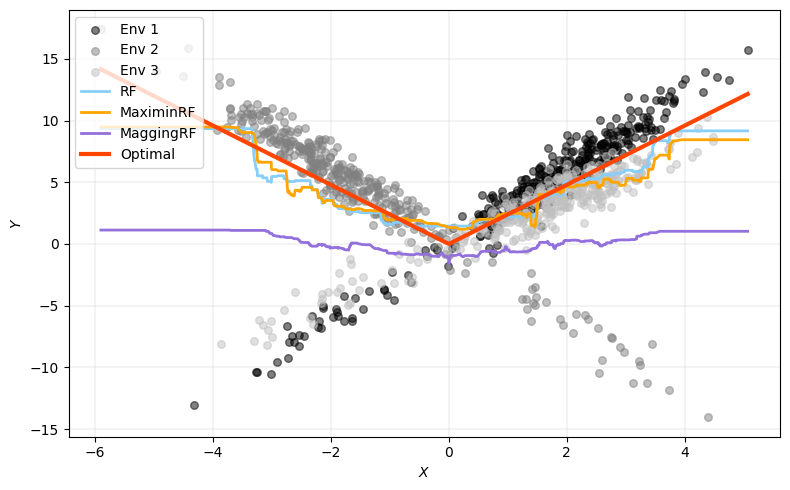

In [17]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_maximin"] = preds_maximin
dtr["fitted_magging"] = preds_magging

plot_dtr(dtr, optfun=2)

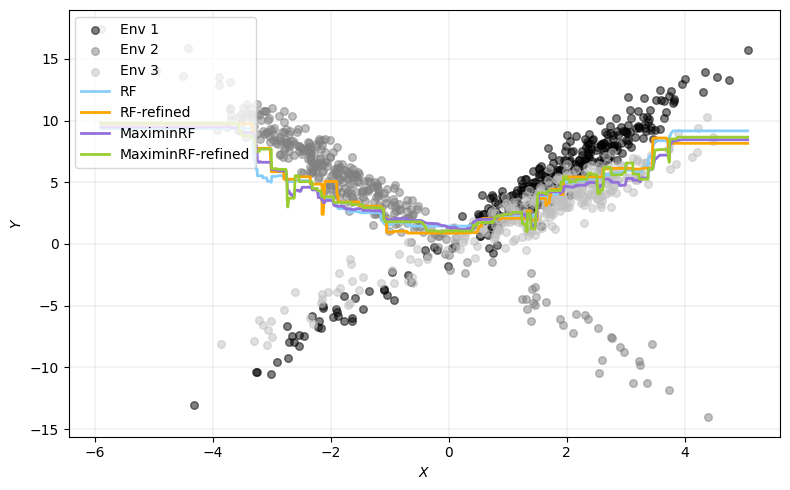

In [18]:
dtr["fitted_maximin_refined"] = preds_maximin_refined
dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr, refined=True)

In [19]:
fitted_opt = np.where(dtr["X"] > 0, 2.4 * dtr["X"], -2.4 * dtr["X"])
max_mse(Ytr, fitted_opt, Etr, verbose=True)

Environment 0 MSE: 18.761318777338772
Environment 1 MSE: 19.838354367249455
Environment 2 MSE: 11.908748973028903


np.float64(19.838354367249455)

## Setting 3

In [21]:
dtr = gen_data_v4(n_easy=500, n_hard=500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v4(n_easy=200, n_hard=200)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [22]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

-------------------------------------------------------
1000
-------------------------------------------------------
433
-------------------------------------------------------
207
-------------------------------------------------------
80
-------------------------------------------------------
127
-------------------------------------------------------
78
-------------------------------------------------------
49
-------------------------------------------------------
226
-------------------------------------------------------
87
-------------------------------------------------------
139
-------------------------------------------------------
70
-------------------------------------------------------
69
-------------------------------------------------------
567
-------------------------------------------------------
218
-------------------------------------------------------
139
-------------------------------------------------------
50
----------------------------------------------

np.float64(24.254786033934113)

In [23]:
fitted_rf_refined, weights_rf_refined = rf.refine_weights(Xtr, Ytr, Etr, Xtr)
preds_rf_refined, _ = rf.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
max_mse(Ytr, fitted_rf_refined, Etr, verbose=True)

Environment 0 MSE: 21.923947699043666
Environment 1 MSE: 21.924985706952633


np.float64(21.924985706952633)

### Maximin

In [24]:
rf_maximin = RandomForest("MaximinRegression",
                          n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          seed=random_state,
                          )
rf_maximin.fit(Xtr, Ytr, Etr)
fitted_maximin = rf_maximin.predict(Xtr)
preds_maximin = rf_maximin.predict(Xtr_sorted)
max_mse(Ytr, fitted_maximin, Etr, verbose=True)

7.128961559016602 71.28961559016602
[4.06388969] 78.41857714918262
-------------------------------------------------------
1000
Remaining:  0 [0. 0.]
Best split:  517 0.8158328721523462
Impurity:  78.41857714918262 26.352014589978122
Best values:  [0.25544395217121835, 10.526457878745871]
Best preds:  (array([ 0.25544395, 10.52645788]), array([517, 483]))
-------------------------------------------------------
483
Remaining:  517 [ 9702.54514277 10436.75219597]
Best split:  189 2.5981295429908795
Impurity:  26.352014589978122 23.564771579788065
Best values:  [6.729899334923294, 11.177405076224318]
Best preds:  (array([ 0.25544395,  6.72989933, 11.17740508]), array([517, 189, 294]))
-------------------------------------------------------
294
Remaining:  706 [ 9998.73363701 10635.8243792 ]
Best split:  235 4.480766569684121
Impurity:  23.564771579788065 22.594163673075062
Best values:  [10.356425513395893, 14.799278717244684]
Best preds:  (array([ 0.25544395,  6.72989933, 10.35642551, 14

np.float64(23.341688120884655)

In [25]:
fitted_maximin_refined, weights_maximin_refined = rf_maximin.refine_weights(Xtr, Ytr, Etr, Xtr)
preds_maximin_refined, _ = rf_maximin.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
max_mse(Ytr, fitted_maximin_refined, Etr, verbose=True)

Environment 0 MSE: 22.514988574286832
Environment 1 MSE: 22.515371024105335


np.float64(22.515371024105335)

### Magging

In [26]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

-------------------------------------------------------
500
-------------------------------------------------------
276
-------------------------------------------------------
143
-------------------------------------------------------
72
-------------------------------------------------------
71
-------------------------------------------------------
133
-------------------------------------------------------
57
-------------------------------------------------------
76
-------------------------------------------------------
39
-------------------------------------------------------
37
-------------------------------------------------------
224
-------------------------------------------------------
98
-------------------------------------------------------
53
-------------------------------------------------------
45
-------------------------------------------------------
126
-------------------------------------------------------
64
--------------------------------------------------

np.float64(29.617105965556338)

In [27]:
min_xplvar(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 explained variance: 53.83240970826648
Environment 1 explained variance: 49.391791001228


np.float64(49.391791001228)

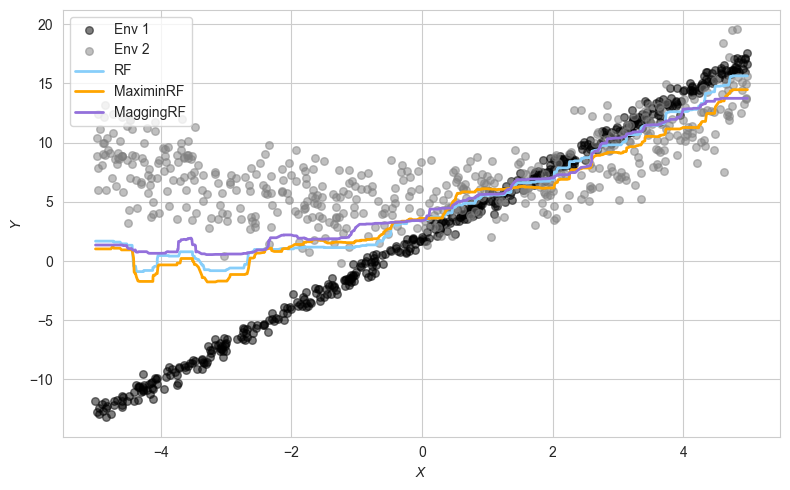

In [28]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_maximin"] = preds_maximin
dtr["fitted_magging"] = preds_magging

plot_dtr(dtr)

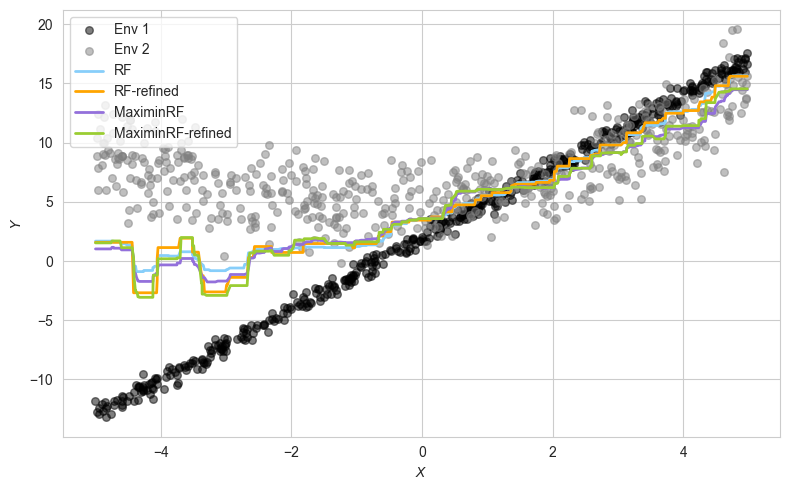

In [39]:
dtr["fitted_maximin_refined"] = preds_maximin_refined
dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr, refined=True)

## Setting 4

In [30]:
dtr = gen_data_v5(n_samples=1000, adv_fraction=0.5, noise_var_env2=10.0)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v5(n_samples=400, adv_fraction=0.5, noise_var_env2=10.0)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [31]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

-------------------------------------------------------
1000
-------------------------------------------------------
393
-------------------------------------------------------
117
-------------------------------------------------------
46
-------------------------------------------------------
71
-------------------------------------------------------
276
-------------------------------------------------------
607
-------------------------------------------------------
254
-------------------------------------------------------
102
-------------------------------------------------------
152
-------------------------------------------------------
353
-------------------------------------------------------
282
-------------------------------------------------------
71
-------------------------------------------------------
1000
-------------------------------------------------------
341
-------------------------------------------------------
117
-----------------------------------------

np.float64(99.11326202088827)

In [32]:
fitted_rf_refined, weights_rf_refined = rf.refine_weights(Xtr, Ytr, Etr, Xtr)
preds_rf_refined, _ = rf.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
max_mse(Ytr, fitted_rf_refined, Etr, verbose=True)

Environment 0 MSE: 10.770279524246897
Environment 1 MSE: 96.7230971843445


np.float64(96.7230971843445)

### Maximin

In [35]:
rf_maximin = RandomForest("MaximinRegression",
                          n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          seed=random_state,
                          )
rf_maximin.fit(Xtr, Ytr, Etr)
fitted_maximin = rf_maximin.predict(Xtr)
preds_maximin = rf_maximin.predict(Xtr_sorted)
max_mse(Ytr, fitted_maximin, Etr, verbose=True)

14.870442568913948 148.70442568913947
[6.43822732] 163.5748682580534
-------------------------------------------------------
1000
Remaining:  0 [0. 0.]
Best split:  607 1.729431325710085
Impurity:  163.5748682580534 110.8626034932369
Best values:  [0.9118549353237521, 13.86565765611556]
Best preds:  (array([ 0.91185494, 13.86565766]), array([607, 393]))
-------------------------------------------------------
393
Remaining:  607 [ 6317.41063882 30143.50220755]
Best split:  275 3.9504529482332265
Impurity:  110.8626034932369 101.7474453066367
Best values:  [11.465452188687728, 19.904884316095327]
Best preds:  (array([ 0.91185494, 11.46545219, 19.90488432]), array([607, 275, 118]))
-------------------------------------------------------
118
Remaining:  882 [ 9518.27167978 48216.50108011]
Best split:  99 4.822961340329796
Impurity:  101.7474453066367 101.22783800497061
Best values:  [19.26486124850163, 23.233004267582555]
-------------------------------------------------------
275
Remainin

np.float64(89.75551254497833)

In [36]:
fitted_maximin_refined, weights_maximin_refined = rf_maximin.refine_weights(Xtr, Ytr, Etr, Xtr)
preds_maximin_refined, _ = rf_maximin.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
max_mse(Ytr, fitted_maximin_refined, Etr, verbose=True)

Environment 0 MSE: 36.97792641417317
Environment 1 MSE: 87.14527967078436


np.float64(87.14527967078436)

### Magging

In [37]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

-------------------------------------------------------
500
-------------------------------------------------------
244
-------------------------------------------------------
139
-------------------------------------------------------
63
-------------------------------------------------------
76
-------------------------------------------------------
32
-------------------------------------------------------
44
-------------------------------------------------------
105
-------------------------------------------------------
46
-------------------------------------------------------
59
-------------------------------------------------------
256
-------------------------------------------------------
153
-------------------------------------------------------
77
-------------------------------------------------------
32
-------------------------------------------------------
45
-------------------------------------------------------
76
--------------------------------------------------

np.float64(128.72598596998915)

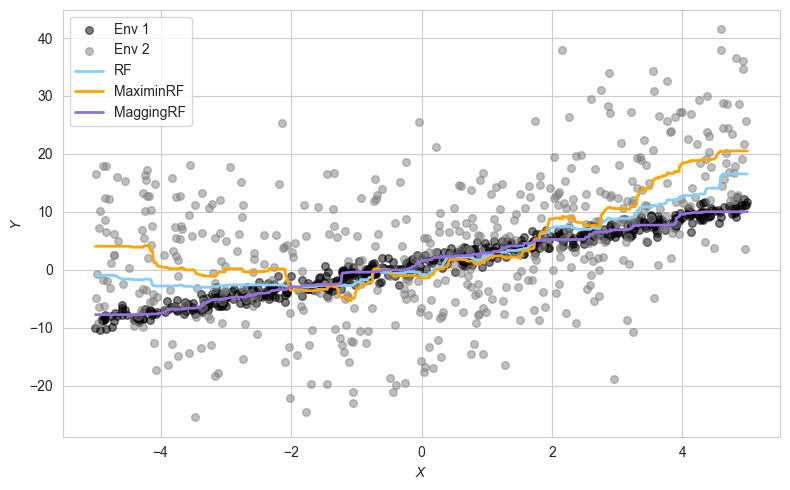

In [38]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_maximin"] = preds_maximin
dtr["fitted_magging"] = preds_magging

plot_dtr(dtr)

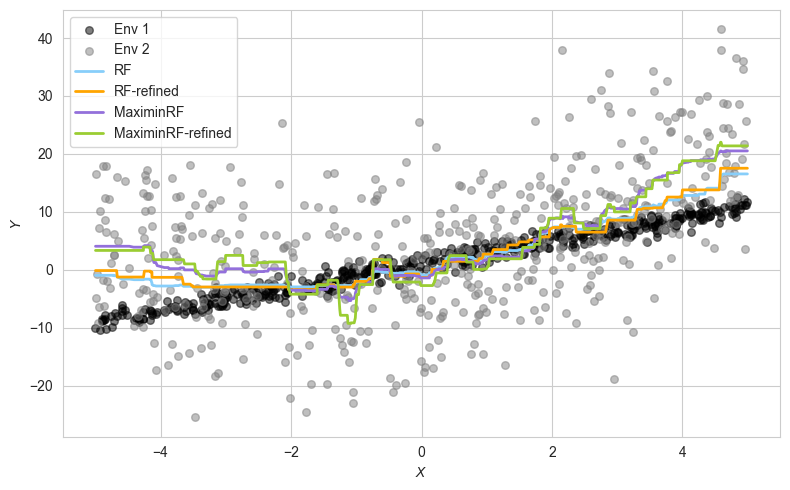

In [39]:
dtr["fitted_maximin_refined"] = preds_maximin_refined
dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr, refined=True)

## Setting 5

In [28]:
dtr = gen_data_v6(n=1000, noise_std=0.5)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v6(n=600)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [29]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

-------------------------------------------------------
999
-------------------------------------------------------
606
-------------------------------------------------------
236
-------------------------------------------------------
370
-------------------------------------------------------
217
-------------------------------------------------------
141
-------------------------------------------------------
76
-------------------------------------------------------
153
-------------------------------------------------------
101
-------------------------------------------------------
52
-------------------------------------------------------
393
-------------------------------------------------------
221
-------------------------------------------------------
123
-------------------------------------------------------
74
-------------------------------------------------------
49
-------------------------------------------------------
98
---------------------------------------------

np.float64(13.1425245939863)

### Maximin

In [30]:
rf_maximin = RandomForest("MaximinRegression",
                          n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          seed=random_state,
                          )
rf_maximin.fit(Xtr, Ytr, Etr)
fitted_maximin = rf_maximin.predict(Xtr)
preds_maximin = rf_maximin.predict(Xtr_sorted)
max_mse(Ytr, fitted_maximin, Etr, verbose=True)

2.684193341736968 26.84193341736968
[1.25623068] 29.52612675910665
-------------------------------------------------------
999
Remaining:  0 [0. 0. 0.]
Best split:  479 0.45826581671781463
Impurity:  29.52612675910665 12.131039122309094
Best values:  [-2.6407381935004577, 4.3047991644206265]
Best preds:  (array([-2.64073819,  4.30479916]), array([479, 520]))
-------------------------------------------------------
520
Remaining:  479 [ 637.9154865  2312.66914481 3068.54638652]
Best split:  281 2.649792531726002
Impurity:  12.131039122309094 10.807726282457386
Best values:  [2.35756791780091, 5.155770804106657]
Best preds:  (array([-2.64073819,  2.35756792,  5.1557708 ]), array([479, 281, 239]))
-------------------------------------------------------
239
Remaining:  760 [1354.01168417 2570.56898921 3165.99170047]
Best split:  233 3.9600554135849677
Impurity:  10.807726282457386 10.54510050210669
Best values:  [4.906934839606186, 10.369422342863496]
---------------------------------------

np.float64(8.695346032048988)

### Magging

In [31]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

-------------------------------------------------------
333
-------------------------------------------------------
148
-------------------------------------------------------
85
-------------------------------------------------------
38
-------------------------------------------------------
47
-------------------------------------------------------
63
-------------------------------------------------------
185
-------------------------------------------------------
52
-------------------------------------------------------
133
-------------------------------------------------------
85
-------------------------------------------------------
31
-------------------------------------------------------
54
-------------------------------------------------------
48
-------------------------------------------------------
333
-------------------------------------------------------
122
-------------------------------------------------------
70
--------------------------------------------------

np.float64(16.906279099098654)

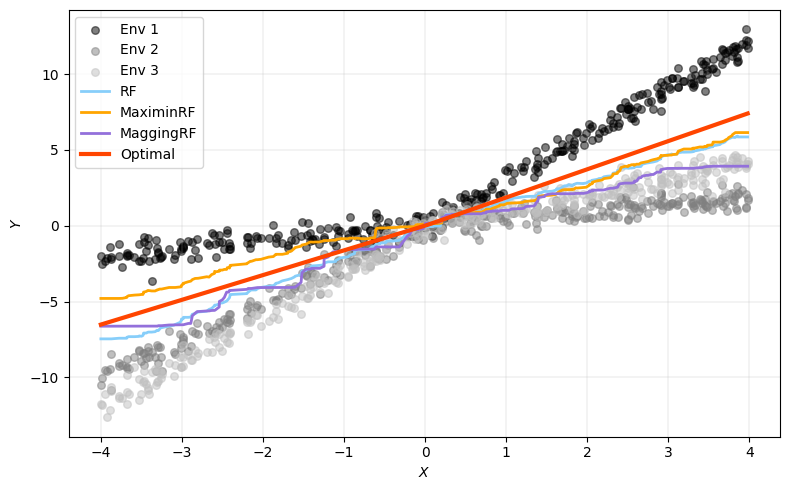

In [32]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_maximin"] = preds_maximin
dtr["fitted_magging"] = preds_magging

plot_dtr(dtr, optfun=3)

In [33]:
fitted_opt = np.where(dtr["X"] > 0, 1.86 * dtr["X"], 1.63 * dtr["X"])
max_mse(Ytr, fitted_opt, Etr, verbose=True)

Environment 0 MSE: 7.53008640478764
Environment 1 MSE: 8.40569076910667
Environment 2 MSE: 6.999298727286172


np.float64(8.40569076910667)

In [72]:
import cvxpy as cp

c_plus  = cp.Variable()
c_minus = cp.Variable()
t = cp.Variable()

f1 = (3 - c_plus)**2 + (0.5 - c_minus)**2
f2 = (0.5 - c_plus)**2 + (2.5 - c_minus)**2
f3 = (1 - c_plus)**2 + (3 - c_minus)**2

obj = cp.Minimize(t)
cons = [f1 <= t, f2 <= t, f3 <= t]
prob = cp.Problem(obj, cons)
prob.solve()

2.5941357788363555

In [73]:
(c_minus.value, c_plus.value)

(array(1.63888889), array(1.86111111))

## Setting 6

In [48]:
dtr = gen_data_v7(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v6(n=600)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [49]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

-------------------------------------------------------
1500
-------------------------------------------------------
1040
-------------------------------------------------------
235
-------------------------------------------------------
120
-------------------------------------------------------
115
-------------------------------------------------------
805
-------------------------------------------------------
697
-------------------------------------------------------
149
-------------------------------------------------------
32
-------------------------------------------------------
117
-------------------------------------------------------
548
-------------------------------------------------------
240
-------------------------------------------------------
202
-------------------------------------------------------
38
-------------------------------------------------------
308
-------------------------------------------------------
211
----------------------------------------

np.float64(0.9944854316638767)

### Maximin

In [50]:
rf_maximin = RandomForest("MaximinRegression",
                          n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          seed=random_state,
                          )
rf_maximin.fit(Xtr, Ytr, Etr)
fitted_maximin = rf_maximin.predict(Xtr)
preds_maximin = rf_maximin.predict(Xtr_sorted)
max_mse(Ytr, fitted_maximin, Etr, verbose=True)

0.1299462725019986 1.299462725019986
[0.1132209] 1.4294089975219846
-------------------------------------------------------
1500
Remaining:  0 [0. 0. 0.]
Best split:  1084 2.0259861137983264
Impurity:  1.4294089975219846 0.92534947672588
Best values:  [0.3660382636671469, -0.6598701173652239]
Best preds:  (array([-0.65987012,  0.36603826]), array([ 416, 1084]))
-------------------------------------------------------
416
Remaining:  1084 [214.8556447  376.38700715 193.33215158]
Best split:  192 2.914258145991436
Impurity:  0.92534947672588 0.8397595043234973
Best values:  [-0.19682711934763472, -0.7955912663828147]
Best preds:  (array([-0.79559127, -0.19682712,  0.36603826]), array([ 224,  192, 1084]))
-------------------------------------------------------
224
Remaining:  1276 [230.50660632 384.9316916  248.89576716]
Best split:  104 3.4633143862808837
Impurity:  0.8397595043234973 0.8347004657262102
Best values:  [-0.5516365218966893, -0.9426093228712134]
Best preds:  (array([-0.94260

np.float64(0.8618012711184144)

### Magging

In [51]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

-------------------------------------------------------
500
-------------------------------------------------------
106
-------------------------------------------------------
63
-------------------------------------------------------
43
-------------------------------------------------------
394
-------------------------------------------------------
266
-------------------------------------------------------
73
-------------------------------------------------------
37
-------------------------------------------------------
36
-------------------------------------------------------
193
-------------------------------------------------------
145
-------------------------------------------------------
48
-------------------------------------------------------
128
-------------------------------------------------------
71
-------------------------------------------------------
32
-------------------------------------------------------
39
-------------------------------------------------

np.float64(1.367959689621982)

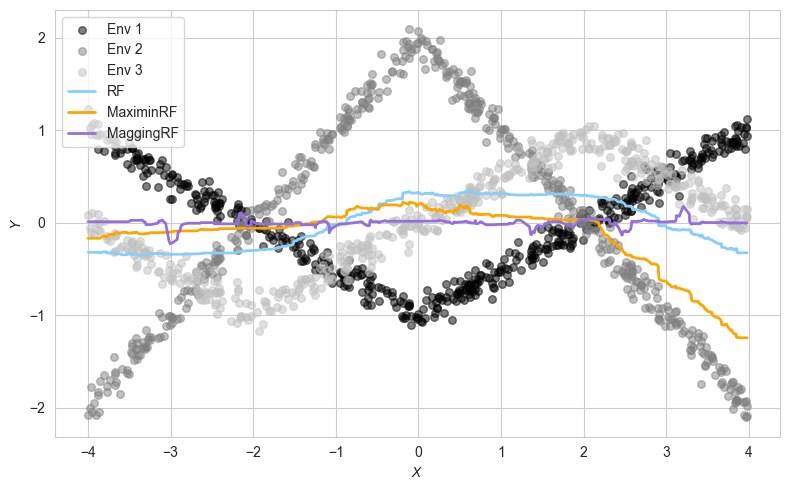

In [52]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_maximin"] = preds_maximin
dtr["fitted_magging"] = preds_magging

plot_dtr(dtr)

## Setting 7

In [54]:
dtr = gen_data_v8(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v6(n=600)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [55]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

-------------------------------------------------------
1500
-------------------------------------------------------
563
-------------------------------------------------------
235
-------------------------------------------------------
328
-------------------------------------------------------
94
-------------------------------------------------------
234
-------------------------------------------------------
61
-------------------------------------------------------
173
-------------------------------------------------------
937
-------------------------------------------------------
564
-------------------------------------------------------
230
-------------------------------------------------------
334
-------------------------------------------------------
373
-------------------------------------------------------
326
-------------------------------------------------------
254
-------------------------------------------------------
223
-----------------------------------------

np.float64(1.4101548676467963)

### Maximin

In [56]:
rf_maximin = RandomForest("MaximinRegression",
                          n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          seed=random_state,
                          )
rf_maximin.fit(Xtr, Ytr, Etr)
fitted_maximin = rf_maximin.predict(Xtr)
preds_maximin = rf_maximin.predict(Xtr_sorted)
max_mse(Ytr, fitted_maximin, Etr, verbose=True)

0.20004235968847273 2.000423596884727
[0.03665842] 2.2004659565731997
-------------------------------------------------------
1500
Remaining:  0 [0. 0. 0.]
Best split:  981 1.2698965827541526
Impurity:  2.2004659565731997 1.226832311876723
Best values:  [0.41739801333120014, -0.5944342743295276]
Best preds:  (array([-0.59443427,  0.41739801]), array([519, 981]))
-------------------------------------------------------
519
Remaining:  981 [268.93839021 404.33247515 268.58174596]
Best split:  267 2.19963988207719
Impurity:  1.226832311876723 1.1210601841490928
Best values:  [-0.21638923847598257, -0.9478973454667341]
Best preds:  (array([-0.94789735, -0.21638924,  0.41739801]), array([252, 267, 981]))
-------------------------------------------------------
252
Remaining:  1248 [391.85767562 491.36392634 278.2570878 ]
Best split:  126 2.7114363708332845
Impurity:  1.1210601841490928 1.118123039828672
Best values:  [-0.8312543353648426, -1.0783505516155314]
Best preds:  (array([-1.07835055,

np.float64(1.087378653726818)

### Magging

In [57]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

-------------------------------------------------------
500
-------------------------------------------------------
262
-------------------------------------------------------
36
-------------------------------------------------------
226
-------------------------------------------------------
165
-------------------------------------------------------
53
-------------------------------------------------------
112
-------------------------------------------------------
61
-------------------------------------------------------
238
-------------------------------------------------------
201
-------------------------------------------------------
32
-------------------------------------------------------
169
-------------------------------------------------------
37
-------------------------------------------------------
500
-------------------------------------------------------
273
-------------------------------------------------------
50
----------------------------------------------

np.float64(2.044599714415324)

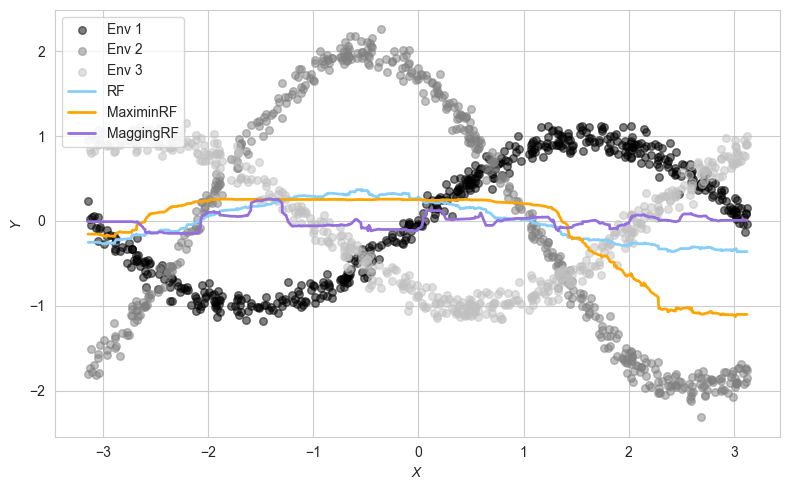

In [58]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_maximin"] = preds_maximin
dtr["fitted_magging"] = preds_magging

plot_dtr(dtr)

## GDRO

In [2]:
from nldg.new.train_nn import train_model_GDRO, predict_GDRO, train_model, predict_default, train_model_GDRO_online
from sklearn.preprocessing import StandardScaler

#dtr = gen_data_v2(n=1000)
#dtr = gen_data_v3(n=1000, setting=2)
#dtr = gen_data_v4(n_easy=500, n_hard=500)
#dtr = gen_data_v5(n_samples=1000, adv_fraction=0.5, noise_var_env2=10.0)
dtr = gen_data_v6(n=1000, noise_std=0.5)
#dtr = gen_data_v7(n=1500)
#dtr = gen_data_v8(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Ytr = Ytr - np.mean(Ytr)
dtr['Y'] = Ytr
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(Xtr)
X_train_sorted = scaler.fit_transform(Xtr_sorted)

lr = 0.01 # 0.01 for second setting
seed = 42
hd = [64, 64]
wd = 0.001
epochs=1500

model, bweights = train_model_GDRO(X_train, Ytr, Etr,
                                   lr_model=lr, hidden_dims=hd,
                                   seed=seed, weight_decay=wd, epochs=epochs)
preds_gdro = predict_GDRO(model, X_train_sorted)
fitted_gdro = predict_GDRO(model, X_train)

In [32]:
bweights

tensor([0.1884, 0.0258, 0.7858])

In [33]:
model_on, bweights_on = train_model_GDRO_online(X_train, Ytr, Etr,
                                                lr_model=lr, hidden_dims=hd,
                                                seed=seed, weight_decay=wd, epochs=epochs)
preds_gdro_on = predict_GDRO(model_on, X_train_sorted)
fitted_gdro_on = predict_GDRO(model_on, X_train)

In [34]:
model_default = train_model(X_train, Ytr,
                            lr=lr, hidden_dims=hd,
                            seed=seed, weight_decay=wd, epochs=epochs)
preds_default = predict_default(model_default, X_train_sorted)
fitted_default = predict_default(model_default, X_train)

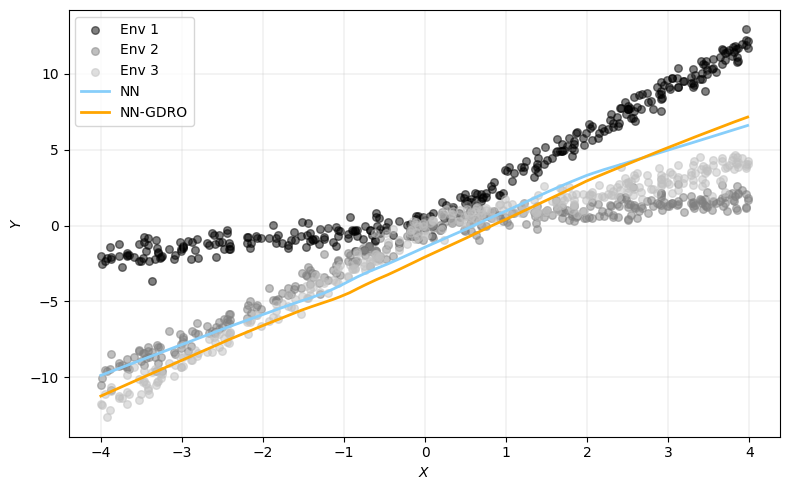

In [35]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_gdro"] = preds_gdro
dtr["fitted_gdro_online"] = preds_gdro_on
dtr["fitted_default"] = preds_default

plot_dtr(dtr, gdro=True)

In [164]:
max_mse(Ytr, fitted_gdro, Etr, verbose=True)

Environment 0 MSE: 1.0216136289362592
Environment 1 MSE: 1.0480624984467044
Environment 2 MSE: 0.9073497157841873


np.float64(1.0480624984467044)

In [165]:
max_mse(Ytr, fitted_default, Etr, verbose=True)

Environment 0 MSE: 0.717661504509395
Environment 1 MSE: 1.4093738059396135
Environment 2 MSE: 0.7483858146073846


np.float64(1.4093738059396135)